## Welcome to the Stray Kids hot megaverse: A Lyrics and Sentiment Study

BY

TRAN THIEN HA MY

### Introduction

In this project, we aim to answer the following questions:

- Which is the most used words in Skz music? Can we find out the most common theme in their songs using the most used words?

- What is the general sentiment in Skz music? Is it positive or negative in general?

- Are Skz song becoming more or less unique? (i.e. repetitive) 

- Who got credited the most as song writer in Skz?

### Data used

We crawled data on Skz song title and song write author from Genius. Then, for the lyrics we crawled them from azlyrics. All Skz songs were used, including solos from members and collabs. 

### Important concepts

Some important definitions/concepts:

This notebook took inspiration from Shaariq Chundrigar's music lyrics analysis on Github. Therefore we will follow their standards of defining positive and negative sentiments, as well as song uniqueness. This helps in the comparison of Skz music to general music trends later.

- Sentiment analysis: Sentiment is a numerical representation of whether a piece of text is positive or negative. It ranges from - to 1. Positive can be defined as happy, uplifting, etc. Negative is the opposite. We define positive as >0.2, and negative <-0.2

- Song uniqueness: this essentially defines how repetitive a song is. For instance, if a song has more choruses than it does verses, chances are it would have a low uniqueness ratio, and would rank quite low in our chart. On the other hand, a song with more unique verses and less repeated choruses would result in a higher uniqueness ratio.



In [3]:
#import necessary libraries
import requests
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

#word processing library
from collections import Counter
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import re
from nltk.stem import WordNetLemmatizer #lemmatization
from nltk.sentiment.vader import SentimentIntensityAnalyzer #sentiment analysis

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = 'Freesentation-4Regular.ttf'
font_prop = font_manager.FontProperties(fname=font_path)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Which is the most used words in Skz lyrics?

We are going to work with English and English translations of the lyrics only. We hope in the future our Korean will improve to the point that we can do it in Korean too.

Text processing:

- Tokenization and Cleaning:
    
    - remove linebreaks, change to lower case, remove punctuation and special characters including other languages besides english
    
    - break lyrics into tokens

- Stopword removal

- Lemmatization


Here is a wordcloud of words in Skz lyrics, including a general wordcloud and a wordcloud for nouns only as we are curious which is the nouns that are the most prominent in their lyrics. From these wordcloud, some insights can be drawn:

Common theme:

- The word cloud gives us a good look at the themes in the Stray Kid's lyrics. Words like "feel," "time," "day," "know," and "want" show that the songs often touch on emotions, the passage of time, daily life, and introspection.
You'll also notice "yeah," "oh," and "go" a lot, which adds a conversational and casual vibe to the lyrics. Words like "get," "go," "make," "let," "run," and "stop" indicate a focus on actions and movements in the lyrics. On the other hand, emotional words such as "feel," "want," "love," "never," "dream," and "cry" suggest that the songs delve into different emotional states and desires. The frequent use of filler words and conversational language in their songs shows they are targeting a modern, youth-oriented audience. This approach makes their music feel current and accessible, allowing them to connect effortlessly with listeners.

_Wordcloud: Skz songs from 2017-2024_


In [173]:
#Load the song info and song lyrics dataframe
eng_lyrics = pd.read_csv('eng_skz_lyrics.csv',index_col =0)
#join all lyrics into one large string
all_lyrics = ' '.join(eng_lyrics['lyrics'])


In [174]:
tokens = word_tokenize(all_lyrics)
tokens = [token.lower() for token in tokens if token.isalpha()]
stop_words = list(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


In [175]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

# Lemmatize tokens
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_tokens]


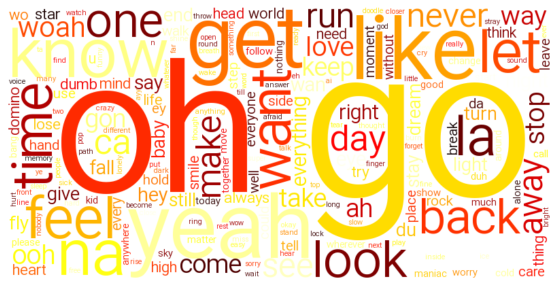

In [176]:

token_counts = Counter(lemmatized_tokens)
sorted_token_counts = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

wordcloud = WordCloud(font_path=r'C:\Users\PC\Documents\TA\Freesentation-4Regular.ttf',colormap = 'hot_r', width=800, height=400, background_color='white').generate_from_frequencies(token_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## What is the general sentiment in Stray Kids music? 

Although the mean sentiment is only 0.4 (is still positive sentiment), a closer look at their other statistics such as median, Q1, Q3 and std shows that while there are extreme negative sentiments present, the median score indicates that the majority of the sentiments lean heavily towards positive. The disparity between the mean and the median suggests a skewed distribution with a notable concentration of highly positive sentiments. This could imply that while most sentiments are positive, there are occasional strong negative sentiments that bring down the average.

In [177]:
sid = SentimentIntensityAnalyzer()
sentiment_result = eng_lyrics.apply(lambda row: sid.polarity_scores(row.lyrics),axis =1)
eng_lyrics['sentiment'] = sentiment_result.apply(lambda row:row['compound'])
eng_lyrics['sentiment_segmented'] = np.where(eng_lyrics['sentiment']>0.2,1,np.where(eng_lyrics['sentiment']<-0.2,-1,0))
eng_lyrics.sort_values('sentiment')
print('Sentiment Analysis using nltk')
eng_lyrics


Sentiment Analysis using nltk


,song,lyrics,sentiment,sentiment_segmented
0,hellevator,My life was rock bottom an edge of a cliff. I...,-0.9942,-1
1,grrrlawoftotalmadnessgrrr,Law of total madness. Grrr my mind is a mess....,-0.9978,-1
2,spreadmywings,I didn't wanna seem young. So I just kept chan...,0.1864,0
3,yayaya,Stray Kids. Watch out. . Yaya yaya yaya. Y...,0.9130,1
4,glow,We can rest but it's still too early. We need ...,0.9704,1
...,...,...,...,...
212,happy,I have no more chances. So I feel sad right no...,0.9992,1
213,allmylifestraykidsremix,All my life I've been runnin' alone. Space an...,0.4671,1
214,destiny,Was our meeting a coincidence . No I believe ...,0.9954,1
215,goingdumb,Yeah. Feels like love . ...,-0.9999,-1


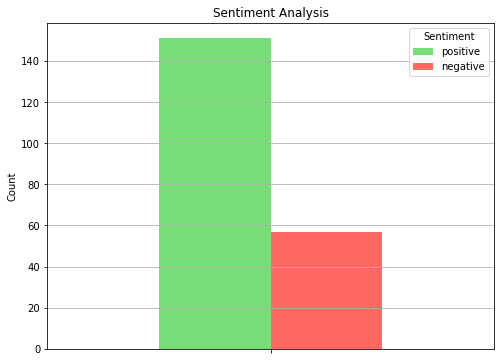

In [178]:
sent_df = pd.DataFrame(columns = ['positive','negative'])
temp = {'positive' :len(eng_lyrics[eng_lyrics['sentiment_segmented']==1]),
'negative': len(eng_lyrics[eng_lyrics['sentiment_segmented']==-1])}
sent_df.loc[0] = temp

sent_df.plot(kind='bar', figsize=(8, 6), color=['#77DD77', '#FF6961']) 
plt.title('Sentiment Analysis')
plt.xlabel(None)
plt.ylabel('Count')
plt.xticks(ticks=[0], labels=[''], rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y')

# Show the plot
plt.show()
del sent_df

In [179]:
#Most negative songs
most_neg = eng_lyrics.sort_values('sentiment').head(10)
most_pos = eng_lyrics.sort_values('sentiment').tail(10)
x = pd.concat([most_neg,most_pos],axis =0)
del most_pos
del most_neg
print('10 Most Negative/Positive songs')
x

10 Most Negative/Positive songs


,song,lyrics,sentiment,sentiment_segmented
215,goingdumb,Yeah. Feels like love . ...,-0.9999,-1
69,ex,On that day I was unusually cold towards you....,-0.9994,-1
99,maniac,Let's go. Relax everyone stop pretending to b...,-0.9992,-1
1,grrrlawoftotalmadnessgrrr,Law of total madness. Grrr my mind is a mess....,-0.9978,-1
210,why,Age is only a number yeah don't care about i...,-0.9978,-1
108,maniacjapaneseversion,Let's go. play. fake. Lock ...,-0.9977,-1
17,voices,Don't hear the cold voices anymore. I'm coveri...,-0.9974,-1
39,sideeffects,I believed in myself and threw myself in. But ...,-0.9970,-1
83,ssick,Come on. Everybody look at me. Smile with a sm...,-0.9966,-1
135,alien,I'm an alien on this earth. ...,-0.9962,-1


In [180]:
print('Statistics of sentiment analysis score of Skz songs')
eng_lyrics.describe()

Statistics of sentiment analysis score of Skz songs


,sentiment,sentiment_segmented
count,217.000000,217.000000
mean,0.395384,0.433180
std,0.805252,0.880028
min,-0.999900,-1.000000
25%,-0.385900,-1.000000
50%,0.912000,1.000000
75%,0.985500,1.000000
max,0.999800,1.000000


In [181]:
eng_lyrics = eng_lyrics.drop(columns = ['sentiment','sentiment_segmented'])

## How unique are Stray Kids' songs?

The wordcount starts at a high point in 2017 of 536 then starts decreasing as time goes by. In 2022, the word count drops significantly to 285, the lowest in the observed period, then rised again in 2023 to 316.2. The sharp drop in 2022 could suggest a shift towards simpler, possibly more repetitive songs. The uniqueness in their songs also see a downward trend although not by much, only by 14%. 





In [182]:
songinfo = pd.read_csv('song_info_cleaned_manual_1.csv',index_col =0)

In [186]:
song_tokenized =eng_lyrics['lyrics'].apply(lambda row: word_tokenize(row))
eng_lyrics['word_count']=song_tokenized.apply(lambda row: len(row))
eng_lyrics['uniqueness']=song_tokenized.apply(lambda row: len(set(row))/len(row))
eng_lyrics['uniqueness']=song_tokenized.apply(lambda row: f'{len(set(row))/len(row):.0%}')
eng_lyrics.sort_values("word_count",ascending = False)


,song,lyrics,word_count,uniqueness
132,igotit,I don't wanna get back son. . ...,948,0.319620
213,allmylifestraykidsremix,All my life I've been runnin' alone. Space an...,811,0.334155
187,godsddududdudu,This is our tang tang tang tang. Ddu Ddu Ddu D...,798,0.319549
37,mixtape4,Hundreds of different paths always without a s...,772,0.369171
22,mixtape2,I remember the day we all first met and said h...,769,0.356307
...,...,...,...,...
204,storythatwontend,. . ...,69,0.173913
191,holdon,. ...,55,0.090909
146,novel,. . . . ...,48,0.229167
144,lostme,. . . ...,46,0.086957


In [188]:
Q3 = pd.merge(left = eng_lyrics, right = songinfo.iloc[:,1:], left_on = 'song',right_on = 'cleaned_title', how = 'left').drop(columns = ['cleaned_title'])
Q3

,song,lyrics,word_count,uniqueness,artist,title,releasedate,album
0,hellevator,My life was rock bottom an edge of a cliff. I...,536,0.352612,"아르마딜로 (Armadillo), BANG CHAN, CHANGBIN, HAN (S...",hellevator,11/1/2017,Mixtape
1,grrrlawoftotalmadnessgrrr,Law of total madness. Grrr my mind is a mess....,482,0.381743,"원택 (1Take) (KOR), Trippy (트리피), HAN (Stray Kid...",grrrlawoftotalmadnessgrrr,1/8/2018,Mixtape
2,spreadmywings,I didn't wanna seem young. So I just kept chan...,601,0.284526,"BANG CHAN, CHANGBIN, HAN (Stray Kids), Trippy ...",어린 날개 (Spread My Wings),1/8/2018,Mixtape
3,yayaya,Stray Kids. Watch out. . Yaya yaya yaya. Y...,581,0.344234,"HAN (Stray Kids), CHANGBIN, BANG CHAN, ​earattack",YAYAYA,1/8/2018,Mixtape
4,glow,We can rest but it's still too early. We need ...,670,0.352239,"CHANGBIN, FELIX (Stray Kids), LEE KNOW, BANG C...",GLOW,1/8/2018,Mixtape
...,...,...,...,...,...,...,...,...
212,happy,I have no more chances. So I feel sad right no...,466,0.345494,HAN (Stray Kids),NaN,NaN,SKZ-REPLAY
213,allmylifestraykidsremix,All my life I've been runnin' alone. Space an...,811,0.334155,"BANG CHAN, CHANGBIN, HAN (Stray Kids)",NaN,NaN,SKZ-REPLAY
214,destiny,Was our meeting a coincidence . No I believe ...,275,0.414545,NaN,NaN,NaN,NaN
215,goingdumb,Yeah. Feels like love . ...,388,0.103093,NaN,NaN,NaN,NaN


In [156]:
# del(eng_lyrics)
# del(songinfo)

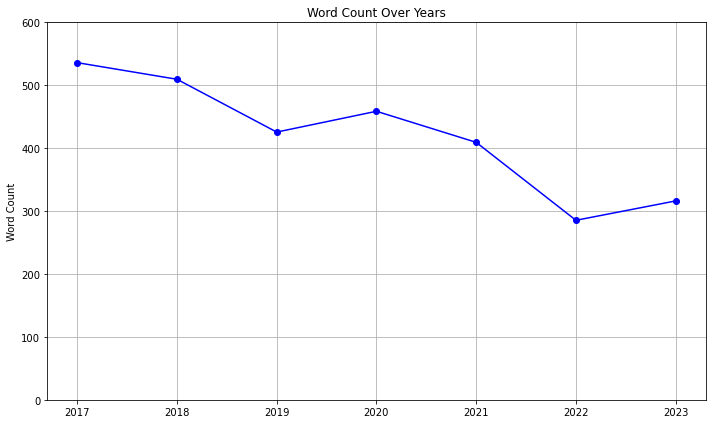

In [200]:
Q3['releasedate'] = pd.to_datetime(Q3['releasedate'])
Q3['year'] = Q3['releasedate'].dt.year
temp = Q3.groupby(['year']).mean().reset_index()
temp = temp[temp['year']<2024] #exclude 2024 because there has only been 2 songs released in 2024, at the time of writing this analysis
plt.figure(figsize=(10, 6))
plt.plot(temp['year'], temp['word_count'], marker='o', linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Word Count')
plt.ylim(0,600)
plt.title('Word Count Over Years')
plt.grid(True)
plt.xticks(temp['year'])
plt.tight_layout()
# del temp

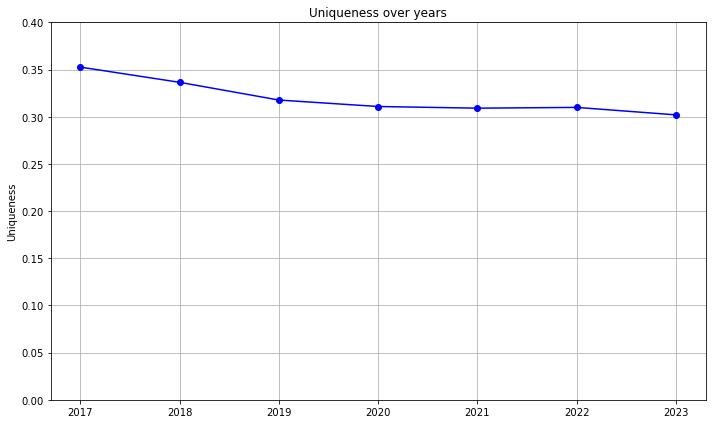

In [199]:
# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(temp['year'], temp['uniqueness'], marker='o', linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Uniqueness')
plt.ylim(0,0.4)
plt.title('Uniqueness over years')
plt.grid(True)
plt.xticks(temp['year'])  # Ensure all years are shown on the x-axis
plt.tight_layout()

In [201]:
Q3[Q3['year']==2022]

,song,lyrics,word_count,uniqueness,artist,title,releasedate,album,year
98,venom,. . . . . Got me got ...,155,0.290323,"BANG CHAN, CHANGBIN, HAN (Stray Kids)",거미줄 (VENOM),2022-03-18,ODDINARY,2022.0
99,maniac,Let's go. Relax everyone stop pretending to b...,512,0.357422,"BANG CHAN, CHANGBIN, HAN (Stray Kids)",MANIAC,2022-03-18,ODDINARY,2022.0
100,charmer,. I'm saucin' livin' in big Seoul C...,196,0.295918,"BANG CHAN, CHANGBIN, HAN (Stray Kids)",Charmer,2022-03-18,ODDINARY,2022.0
101,freeze,. . . . ...,132,0.280303,"BANG CHAN, CHANGBIN, HAN (Stray Kids)",땡 (FREEZE),2022-03-18,ODDINARY,2022.0
102,lonelyst,Falling down. I'm falling down. The st...,188,0.234043,"BANG CHAN, CHANGBIN",Lonely St.,2022-03-18,ODDINARY,2022.0
103,waitingforus,. . Ligh...,78,0.307692,"BANG CHAN, LEE KNOW, SEUNGMIN, I.N",피어난다 (Waiting For Us),2022-03-18,ODDINARY,2022.0
104,muddywater,Uh rain falling on my face and washing off th...,274,0.354015,"CHANGBIN, HYUNJIN, HAN (Stray Kids), FELIX (St...",Muddy Water,2022-03-18,ODDINARY,2022.0
105,circus,Voice of great success like a megaphone Megap...,567,0.338624,"BANG CHAN, CHANGBIN, HAN (Stray Kids), ​earatt...",CIRCUS,2022-06-10,CIRCUS,2022.0
106,fairytale,I can't reach you even if I wanted to hold on ...,424,0.358491,"HAN (Stray Kids), Millionboy (밀리언보이), KM-Markit",Fairytale,2022-06-22,CIRCUS,2022.0
107,venomjapaneseversion,Spider web Spider web . Spider web Spider ...,205,0.268293,"BANG CHAN, CHANGBIN, HAN (Stray Kids), Yo-Hei,...",蜘蛛の巣 (VENOM) (Japanese Version),2022-06-22,CIRCUS,2022.0


## Who gets the most song write credit in Stray Kids?

A quick join and count reveals that Stray Kids write their own song, with their members get most of the song write credit. 3RACHA members get most credits in writing their songs, with Bang Chan at number 1 (158 songs), next is Han and Chang Bin. An interesting finding is km-markit and 베르사최(versachoi) also featured in a sizeable amount of songs, the number similar to their other 6 members.

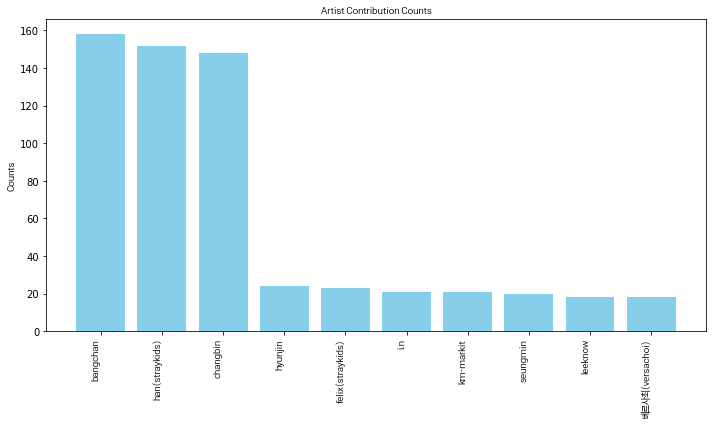

In [202]:
songcredit =','.join(Q3['artist'].astype(str)).split(',')
lyricists = []
for i in songcredit:
    i=i.lower().replace(" ","")
    lyricists.append(i)
sorted_credit = dict(sorted(Counter(lyricists).items(), key=lambda item: item[1],reverse = True)[:10])
sorted_credit
plt.figure(figsize=(10, 6))
plt.bar(sorted_credit.keys(), sorted_credit.values(), color='skyblue')
plt.xticks(fontproperties=font_prop, rotation=90, ha='right')
plt.xlabel(None)
plt.ylabel('Counts', fontproperties=font_prop)
plt.title('Artist Contribution Counts', fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [150]:
print(sorted_credit)

{'bangchan': 158, 'han(straykids)': 152, 'changbin': 148, 'hyunjin': 24, 'felix(straykids)': 23, 'i.n': 21, 'km-markit': 21, 'seungmin': 20, 'leeknow': 18, '베르사최(versachoi)': 18}


### Conclusion

Overall we had fun making this 